In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Prakash Enerprener\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\Prakash Enerprener\OneDrive\Desktop\data science\linear recuresion\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
len(df)

301

In [7]:
len(df.columns)

9

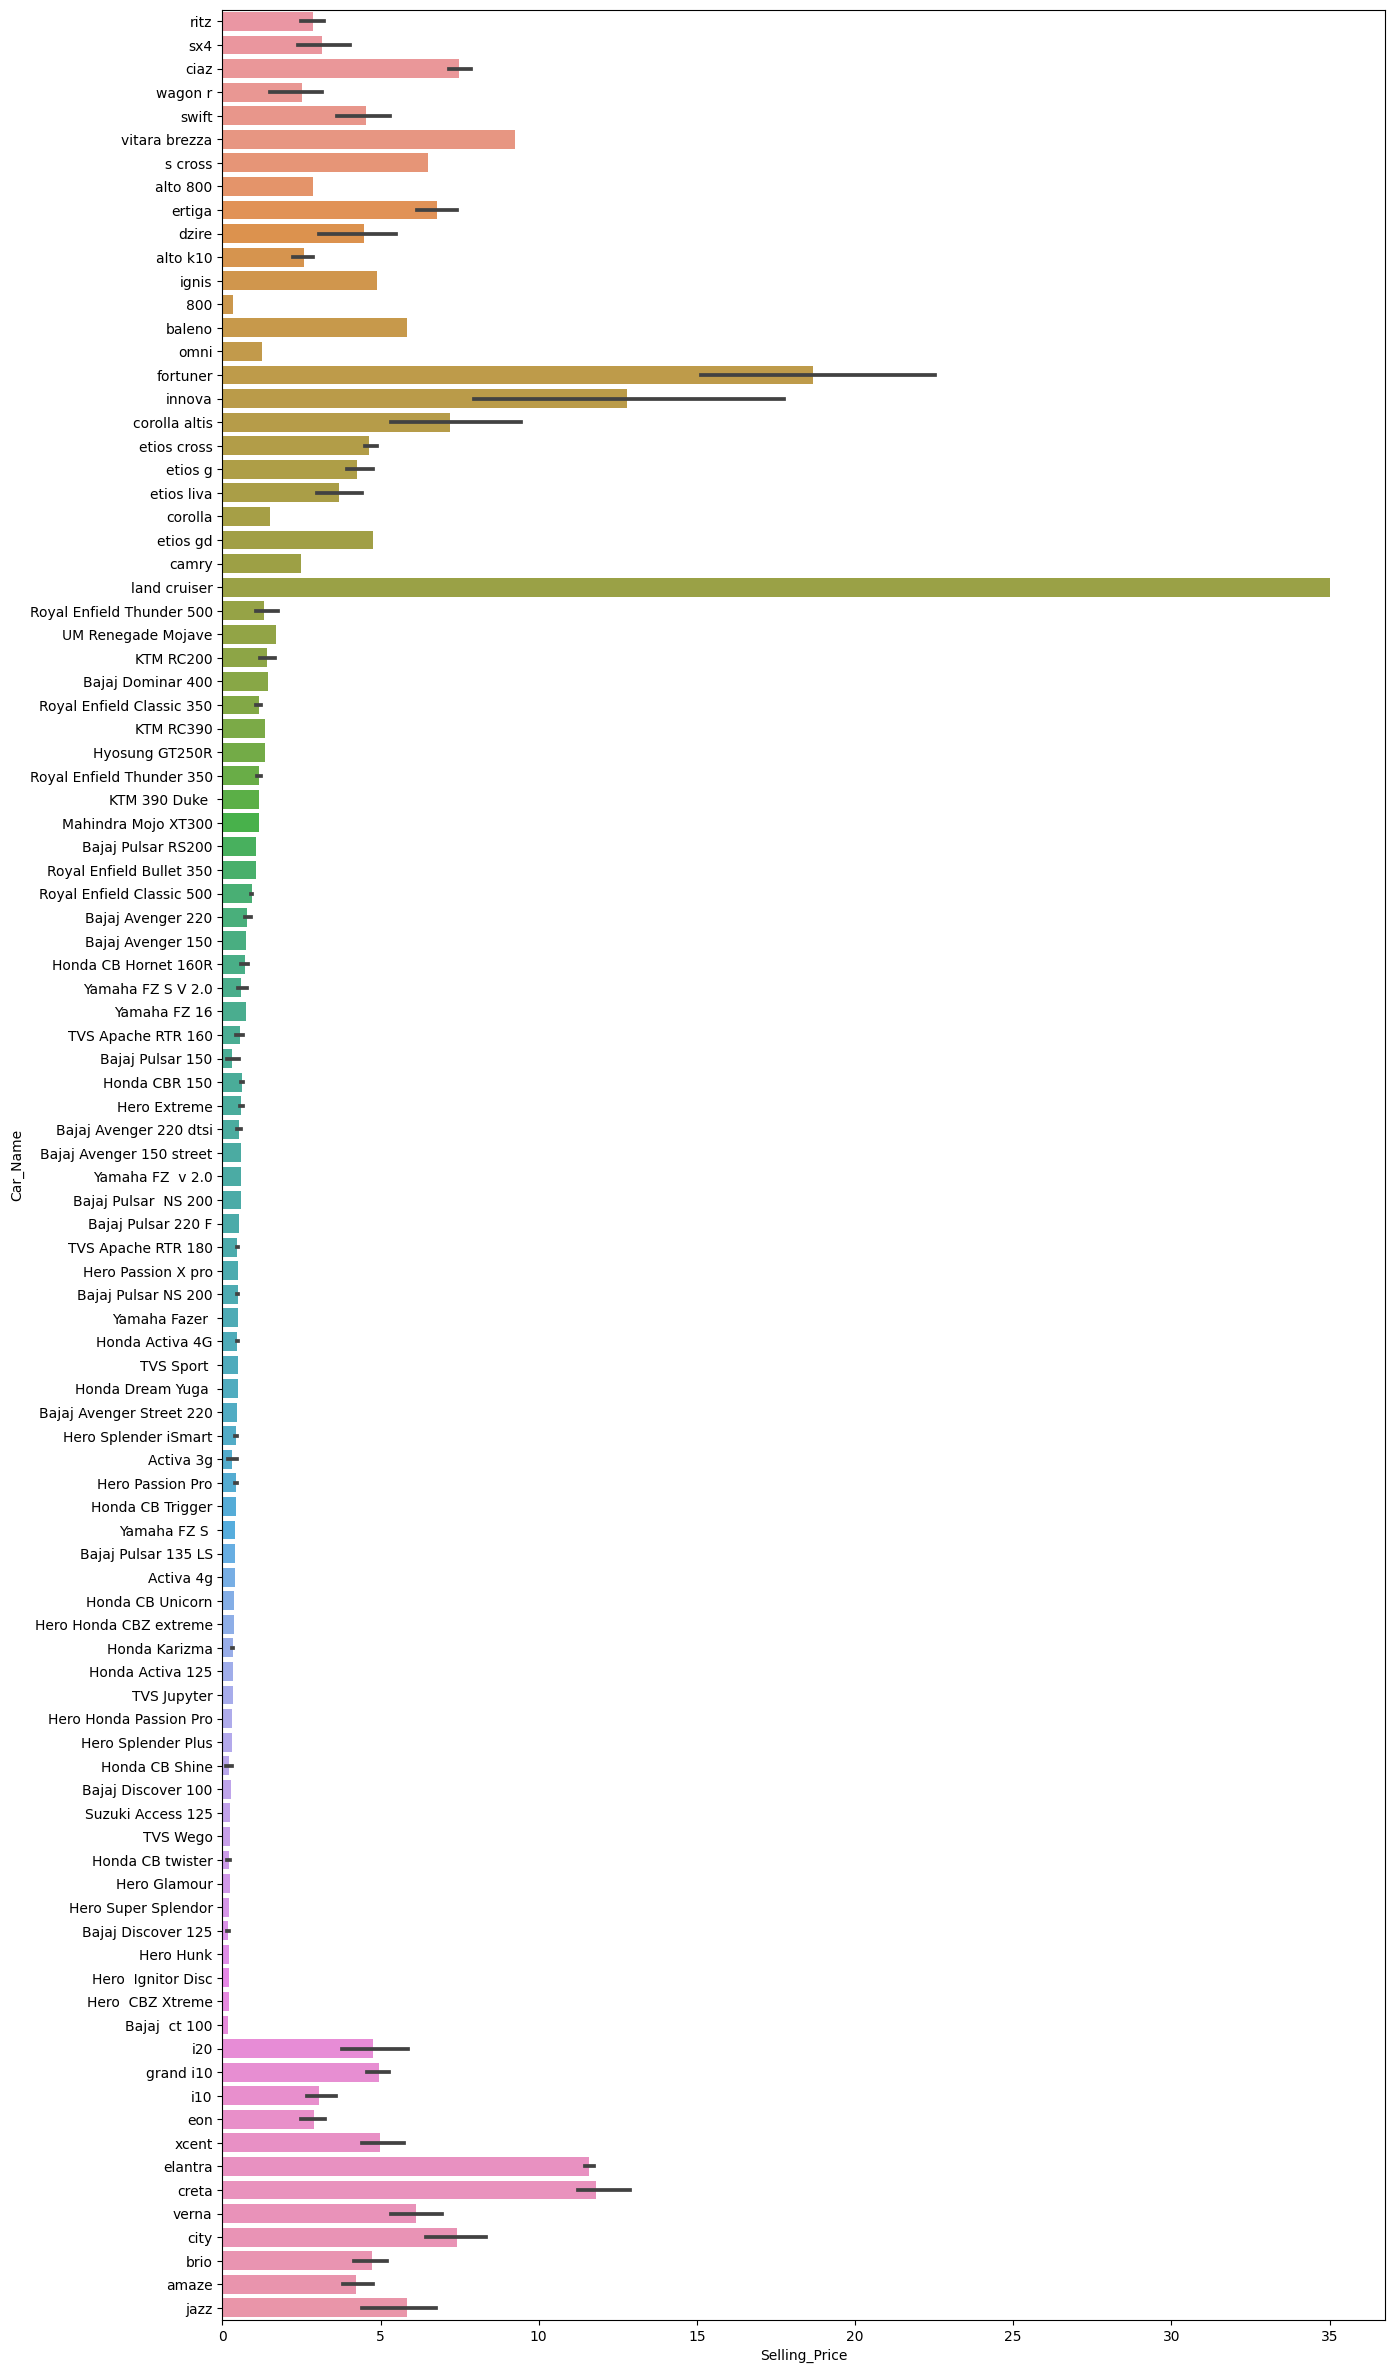

In [8]:
plt.figure(figsize=(15,30))
sns.barplot(data=df,y='Car_Name',x='Selling_Price')
plt.show()

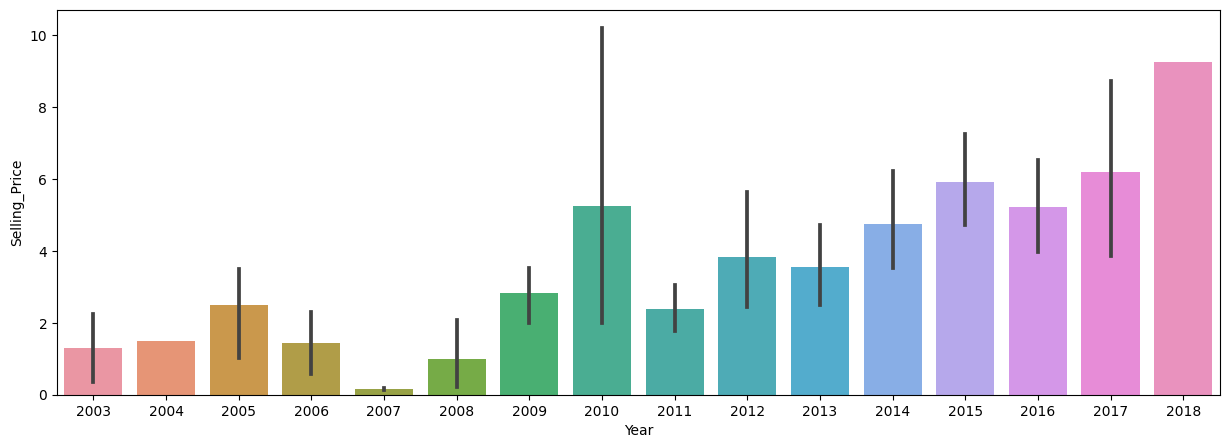

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,y='Selling_Price',x='Year')
plt.show()

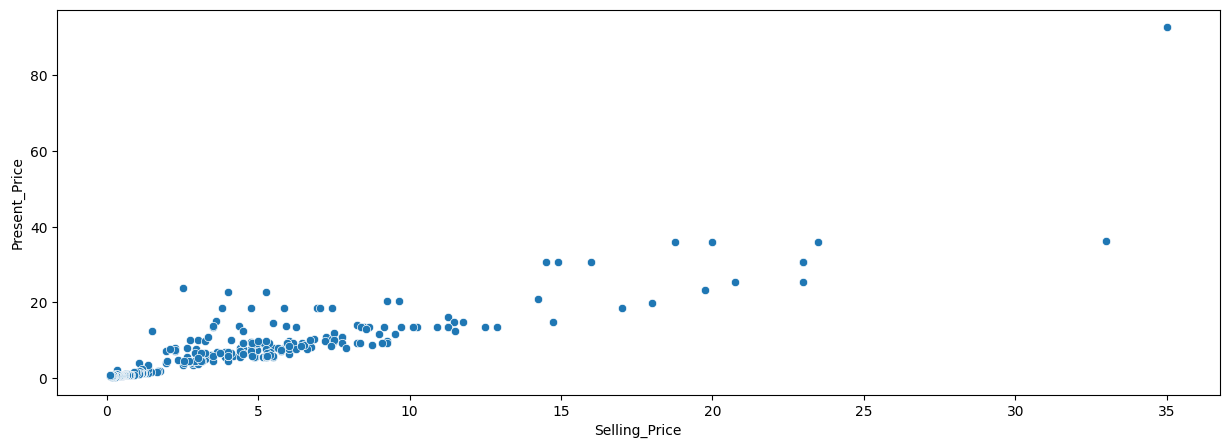

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,y='Present_Price',x='Selling_Price')
plt.show()

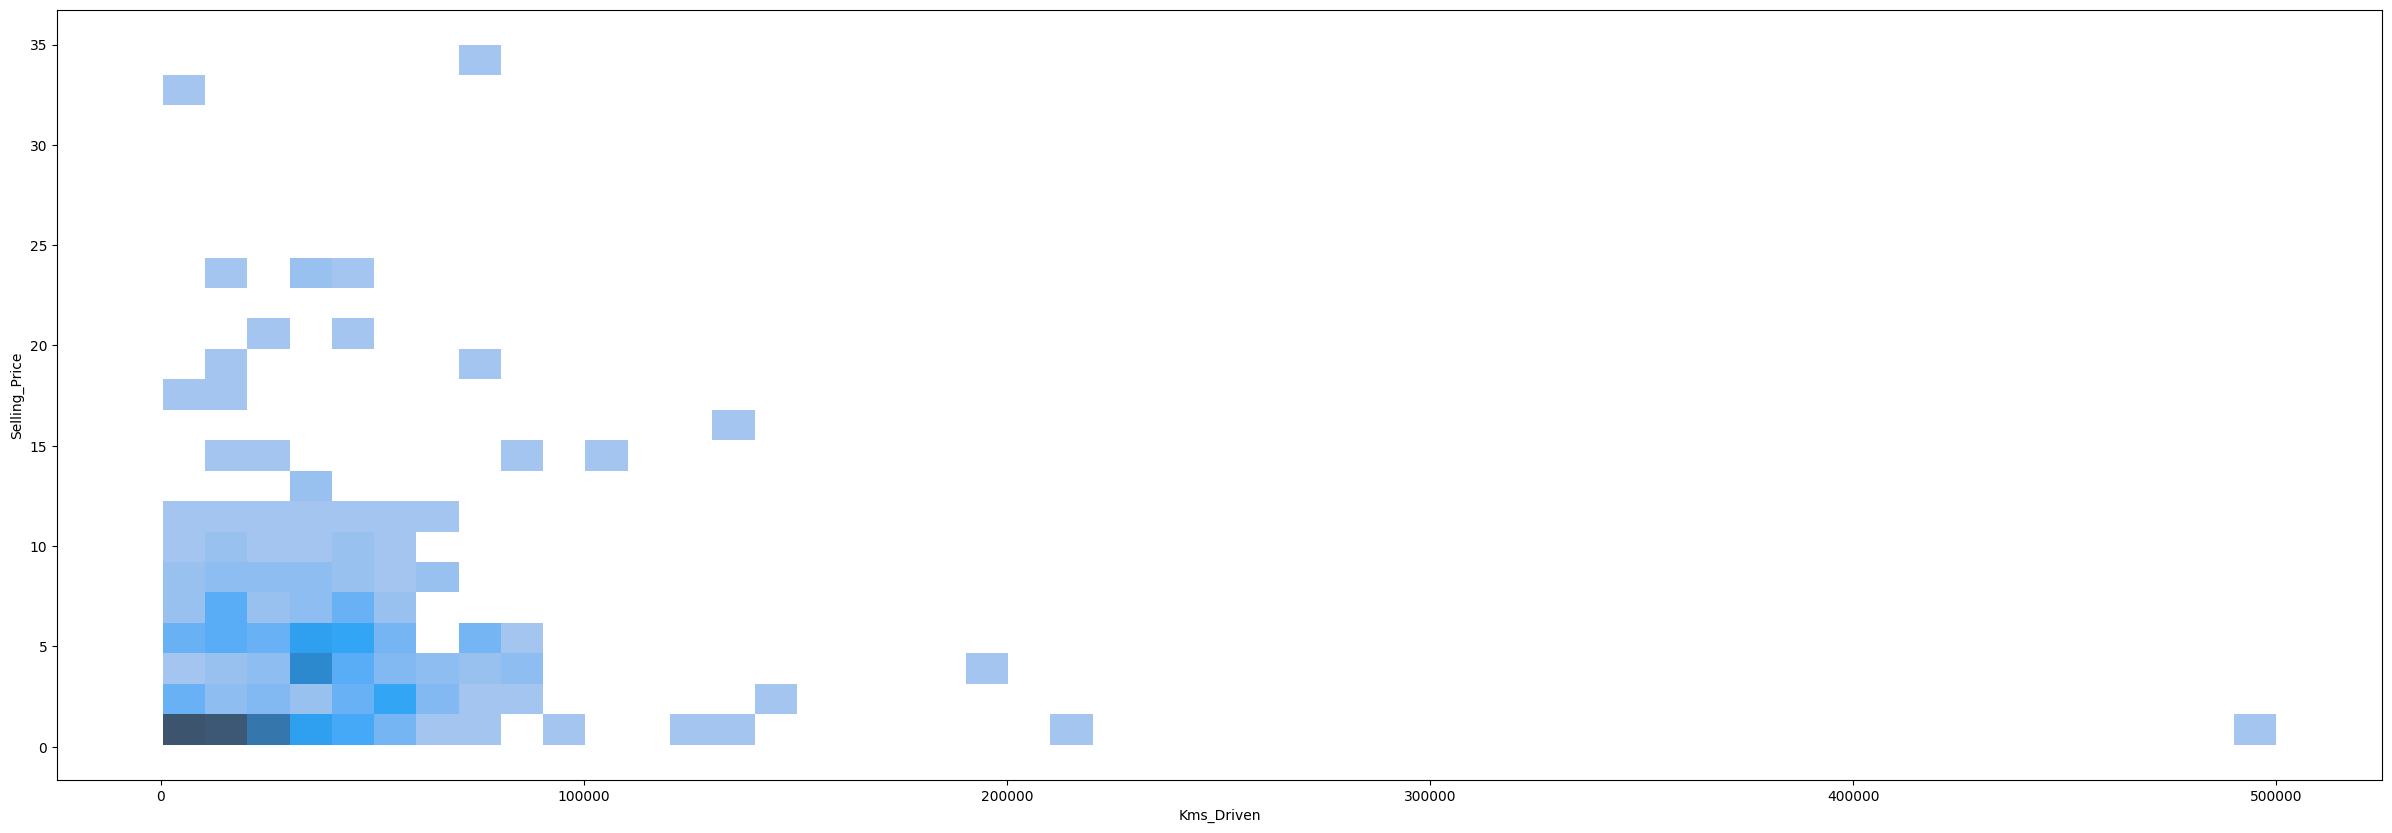

In [11]:
plt.figure(figsize=(30,10))
sns.histplot(data=df,y='Selling_Price',x='Kms_Driven')
plt.show()

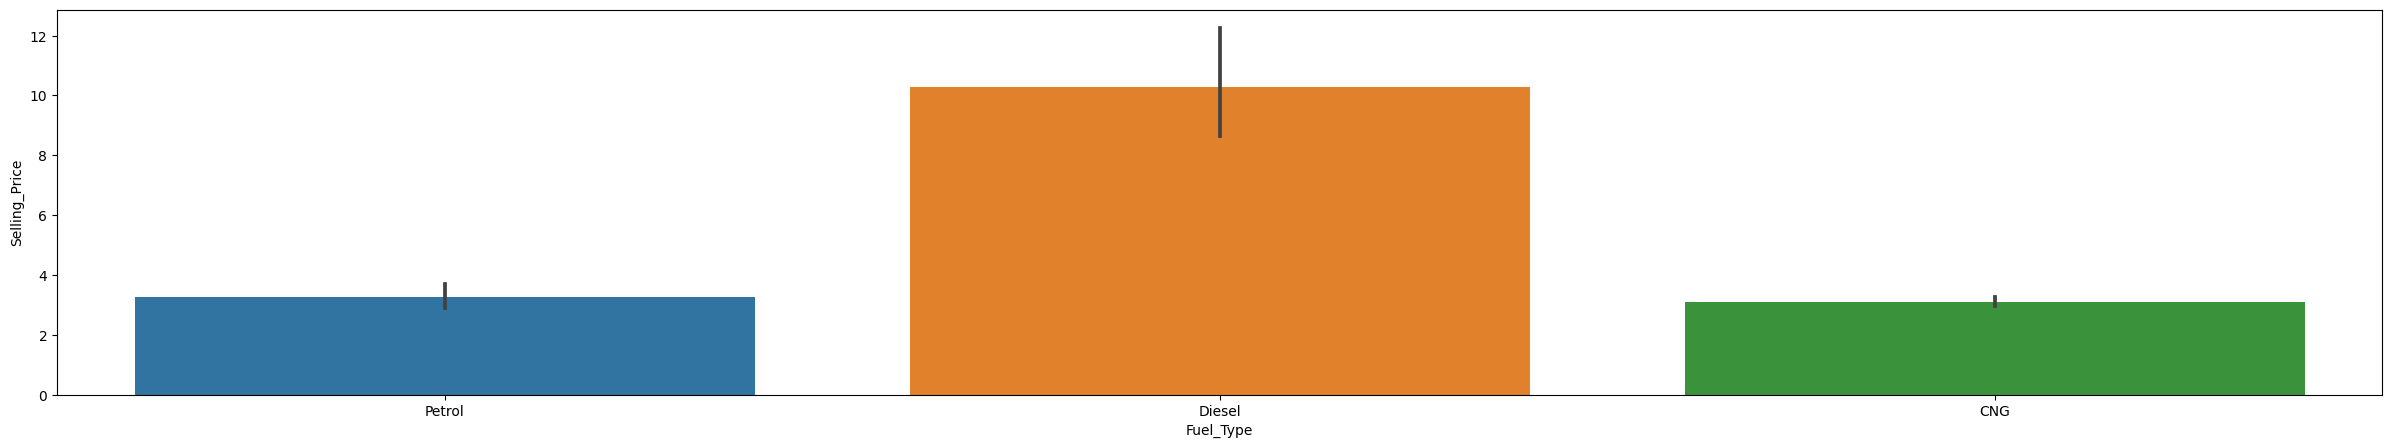

In [12]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Fuel_Type')
plt.show()

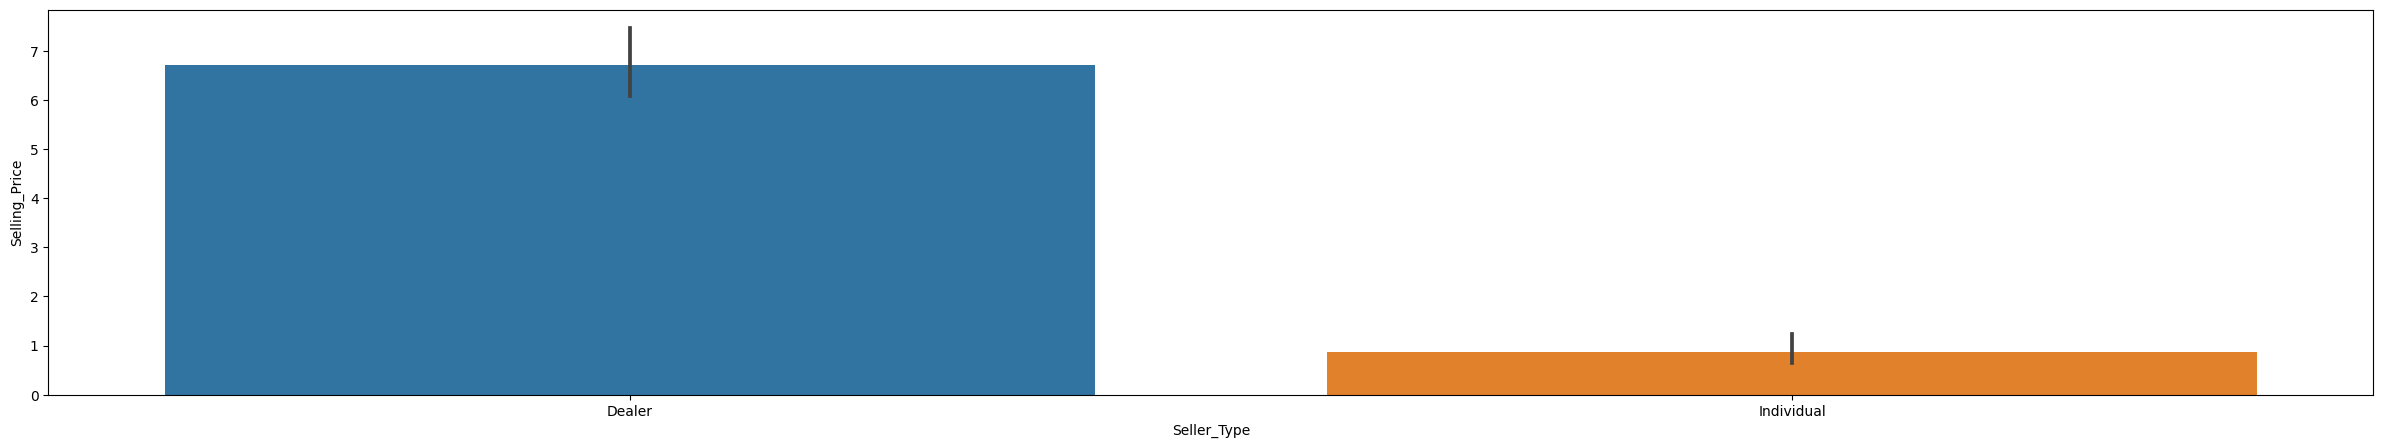

In [13]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Seller_Type')
plt.show()

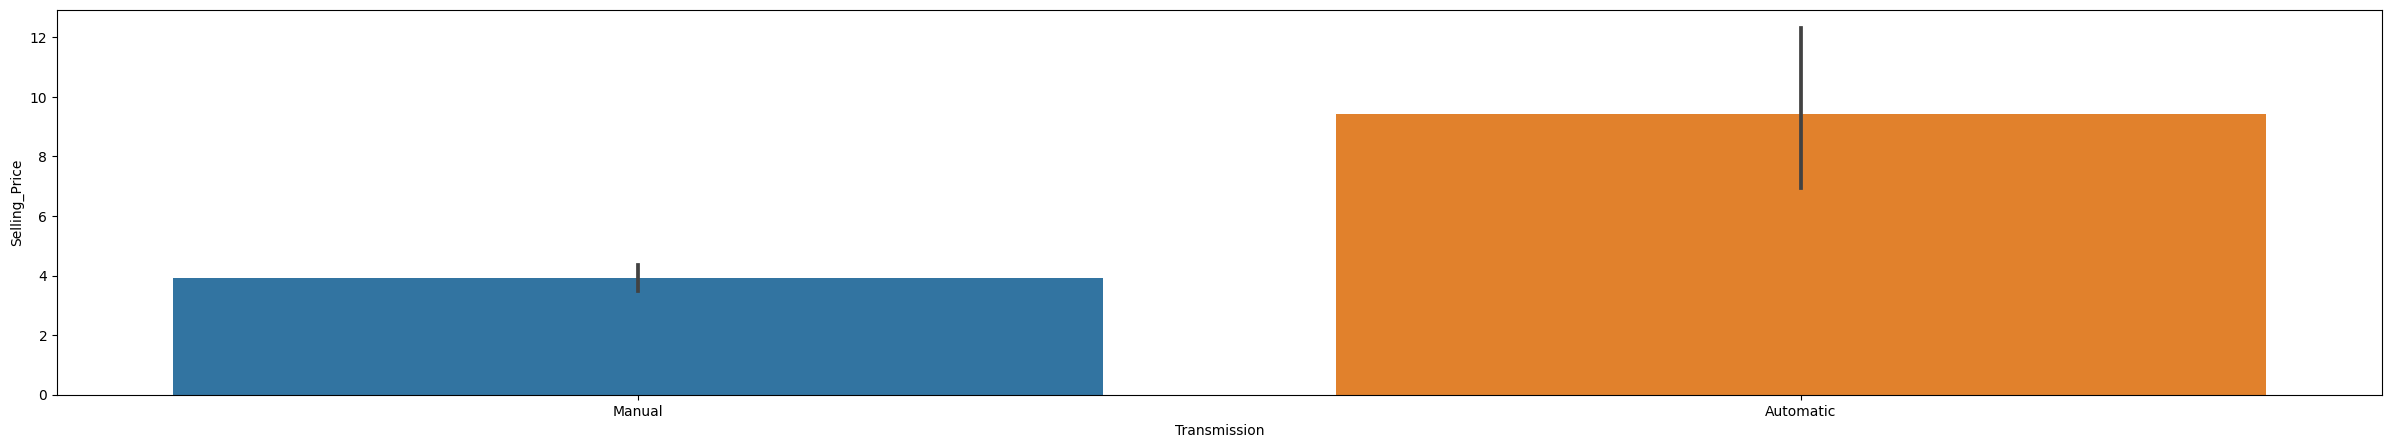

In [14]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Transmission')
plt.show()

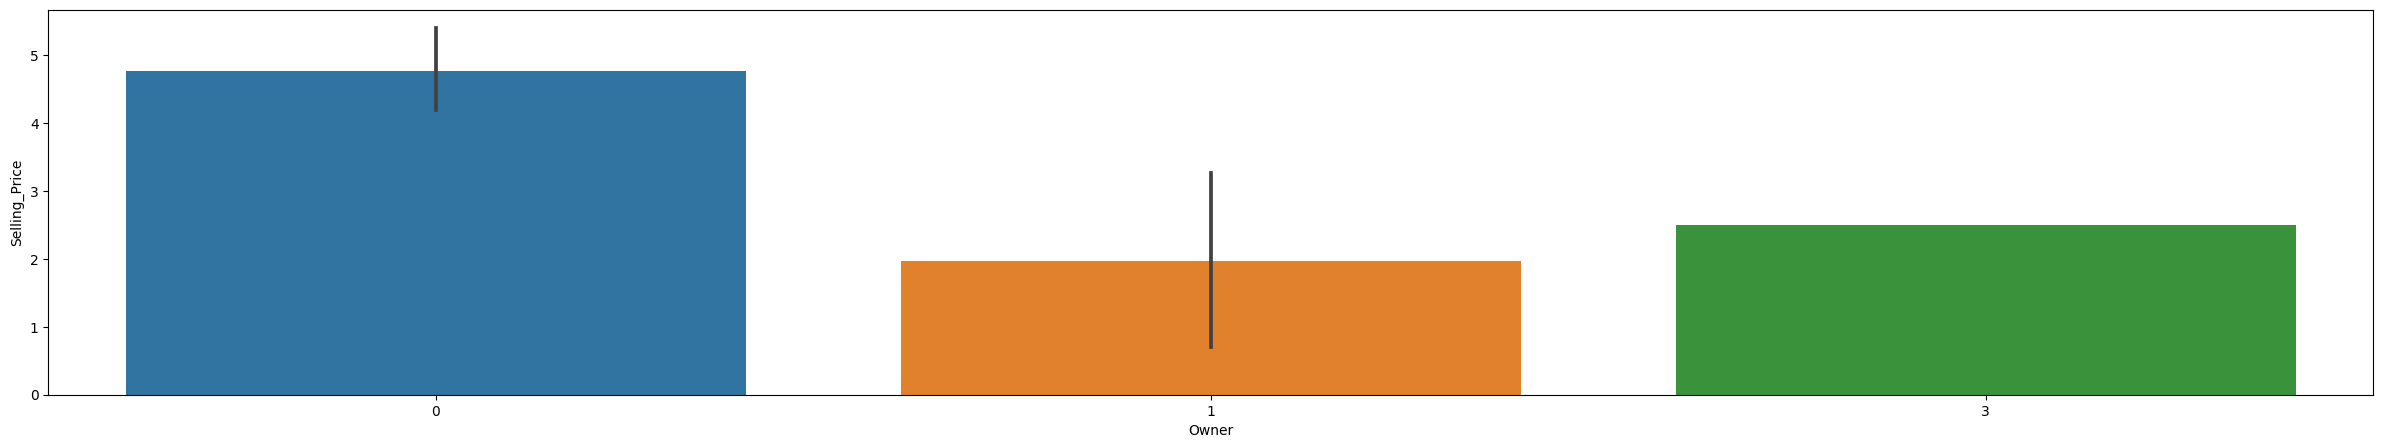

In [15]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Owner')
plt.show()

In [18]:
df.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [20]:
cat_cols=df.select_dtypes(include='object')

In [43]:
num_cols = df.drop(columns=cat_cols)

In [44]:
num_cols

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [21]:
cat_cols

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming cat_cols is a DataFrame containing categorical columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column individually
cat_lab_en1 = cat_cols.apply(label_encoder.fit_transform)

In [41]:
cat_lab_en1

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1
...,...,...,...,...
296,69,1,0,1
297,66,2,0,1
298,69,2,0,1
299,69,1,0,1


In [45]:
df=pd.concat([num_cols,cat_lab_en1],axis=1)

In [46]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,69,1,0,1
297,2015,4.00,5.90,60000,0,66,2,0,1
298,2009,3.35,11.00,87934,0,69,2,0,1
299,2017,11.50,12.50,9000,0,69,1,0,1


In [72]:
X= df.drop(columns=['Selling_Price'])

In [73]:
y=df['Selling_Price']

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)


ElasticNet()

In [77]:
print("Multiple Linear Regression Coefficients:", mlr_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("ElasticNet Regression Coefficients:", elasticnet_model.coef_)


Multiple Linear Regression Coefficients: [ 3.61971567e-01  4.40549173e-01 -5.62000201e-06 -9.09505436e-01
 -3.30652756e-03 -1.33947260e+00 -1.30760518e+00 -1.63944381e+00]
Ridge Regression Coefficients: [ 3.65233118e-01  4.42729116e-01 -5.39751882e-06 -8.64502025e-01
 -2.14758580e-03 -1.29774593e+00 -1.22943524e+00 -1.55762930e+00]
Lasso Regression Coefficients: [ 2.72910151e-01  4.79337217e-01 -5.64267532e-06 -0.00000000e+00
  1.93887754e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
ElasticNet Regression Coefficients: [ 3.27292775e-01  4.81711339e-01 -3.82169273e-06 -0.00000000e+00
  1.93121439e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [78]:
# Predictions
mlr_pred = mlr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

# Calculate SSE
mlr_sse = mean_squared_error(y_test, mlr_pred)
ridge_sse = mean_squared_error(y_test, ridge_pred)
lasso_sse = mean_squared_error(y_test, lasso_pred)
elasticnet_sse = mean_squared_error(y_test, elasticnet_pred)

print("MSE for Multiple Linear Regression:", mlr_sse)
print("MSE for Ridge Regression:", ridge_sse)
print("MSE for Lasso Regression:", lasso_sse)
print("MSE for ElasticNet Regression:", elasticnet_sse)


MSE for Multiple Linear Regression: 3.5347190697131405
MSE for Ridge Regression: 3.5173358165278583
MSE for Lasso Regression: 4.523679480610401
MSE for ElasticNet Regression: 4.269188710803549


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
from sklearn.model_selection import train_test_split

# Define a function to train and evaluate a model
def train_and_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return sse, r2

# Try different hyperparameters for Ridge Regression
ridge_alphas = [0.1, 1, 10]
best_ridge_model = None
best_ridge_sse = float('inf')
best_ridge_r2 = 0

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    sse, r2 = train_and_evaluate_model(ridge_model)
    if sse < 5000 and r2 > 0.8 and sse < best_ridge_sse:
        best_ridge_model = ridge_model
        best_ridge_sse = sse
        best_ridge_r2 = r2

# Similarly, try different hyperparameters for Lasso Regression and ElasticNet
# Evaluate and compare the models

# Print the results
if best_ridge_model is not None:
    print("Best Ridge Regression model:")
    print("Sum of Squared Error:", best_ridge_sse)
    print("R-squared:", best_ridge_r2)
else:
    print("No Ridge Regression model meets the criteria.")

# Repeat for Lasso and ElasticNet



Best Ridge Regression model:
Sum of Squared Error: 3.479691544183395
R-squared: 0.8489427719483997
